In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1lcG9A-Vt-iiYq0s0xZIK7BZIJbnBjgpy', encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data.isnull().sum()

,0
label,0
message,0


In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
print(y_train.isnull().sum())

0


In [ ]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model.fit(X_train_vect, y_train)
y_pred = model.predict(X_test_vect)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



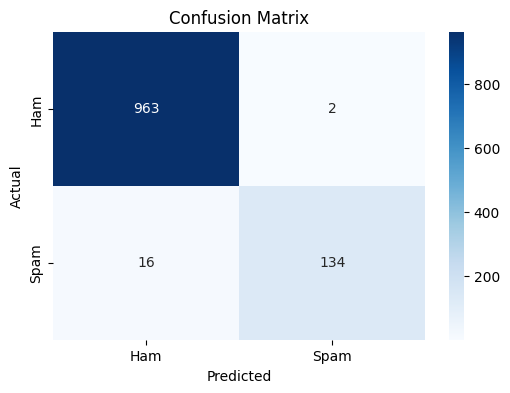

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
def predict_spam(message):
    message_vec = vectorizer.transform([message])
    prediction = model.predict(message_vec)
    return 'Spam' if prediction == 1 else 'Ham'


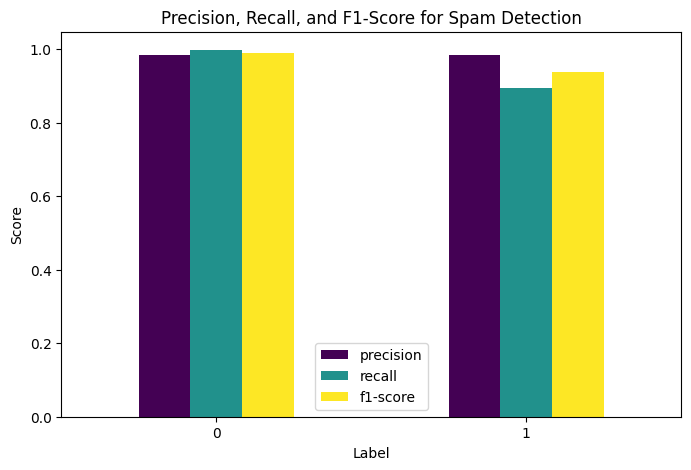

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].iloc[:2].plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Precision, Recall, and F1-Score for Spam Detection')
plt.xlabel('Label')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()